## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### ① 导数

In [162]:
from sklearn.datasets import load_boston

In [163]:
data = load_boston()

In [164]:
X, Y = data['data'], data['target']

In [165]:
# X[:, 5]

In [166]:
def price(rm , k ,b):
    """Price Function"""
    return k * rm + b

In [167]:
def loss(y, y_hat):
    """Loss Function"""
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

#### 公式

#### loss
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

#### loss 对k求偏导
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

#### loss 对b求偏导
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

#### 导数

In [168]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient

In [169]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [170]:
import random

In [171]:
try_times = 2000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 1e-4

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss(Y, price_by_k_and_b)
    
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0:
            print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    k = k + (-1 * k_gradient) * rate  # k与偏导方向相反
    b = k + (-1 * b_gradient) * rate  # b与偏导方向相反
    

when time is 0, best_k is -53.366324814817226, best_b is -84.00011912639502, loss is 197260.21065343276
when time is 50, best_k is -32.3298059002492, best_b is -32.277724826298005, loss is 67448.99817114287
when time is 100, best_k is -19.13787680661473, best_b is -19.10519099292722, loss is 26652.19919809111
when time is 150, best_k is -10.849913158569684, best_b is -10.82941261444122, loss is 10552.12785324622
when time is 200, best_k is -5.642915687330882, best_b is -5.630070662757609, loss is 4199.056713005487
when time is 250, best_k is -2.371566557815507, best_b is -2.363531191278596, loss is 1692.5625216097603
when time is 300, best_k is -0.31630818938097066, best_b is -0.31129453943167623, loss is 703.933199722821
when time is 350, best_k is 0.974928787714762, best_b is 0.978044013479458, loss is 314.15725167201094
when time is 400, best_k is 1.7861615536902051, best_b is 1.788084075149197, loss is 160.58914360910398
when time is 450, best_k is 2.2958267911839245, best_b is 2.2

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
def draw_rm_price():
    plt.scatter(X[:, 5], Y)

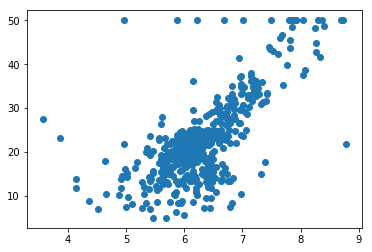

In [174]:
draw_rm_price()

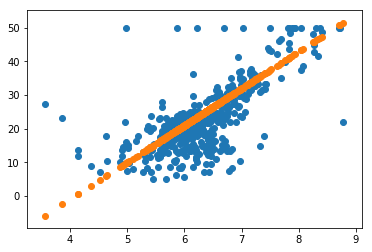

In [175]:
k = 11
b = -45
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

#### ② 动态规划

In [176]:
from collections import defaultdict

In [177]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [178]:
price = defaultdict(int)

In [179]:
for i, p in enumerate(original_price):
    price[i + 1] = p

In [180]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

##### python函数式编程

In [181]:
def example(f, arg):
    return f(arg)

In [182]:
def add_ten(num):
    return num + 10

In [183]:
def mul_ten(num):
    return num * 10 

In [184]:
operations = [add_ten, mul_ten]

for f in operations:
    print(example(f, 100))

110
1000


#### 装饰器

#### 无参数

In [185]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    
    print('function: {} called once! '.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [186]:
def some_funcion_1(): 
    print('I am function 1')

In [187]:
get_call_times(some_funcion_1)

I am function 1
function: some_funcion_1 called once! 


In [188]:
called_time

defaultdict(int, {'some_funcion_1': 1})

#### 有参数

In [189]:
from functools import wraps

In [190]:
called_time_with_arg = defaultdict(int)
def get_call_time(f):
    @wraps(f)
    def wrap(n):
        result = f(n)
        
        called_time_with_arg[(f.__name__, n)] += 1
        
        return result
    return wrap

In [191]:
def add_ten(n): return n + 10

In [192]:
add_ten = get_call_time(add_ten)
add_ten(10)

20

#### @

In [193]:
@get_call_time
def add_twenty(n): 
    return n + 20

In [194]:
# 相当于 add_twenty = get_call_time(add_twenty)

In [195]:
add_twenty(9)

29

#### ③ Cutting Problem

In [196]:
solution = {}

In [197]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

In [198]:
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [199]:
r(10)

30

In [200]:
solution

{1: [1, 0],
 2: [2, 0],
 3: [3, 0],
 4: [2, 2],
 5: [2, 3],
 6: [6, 0],
 7: [1, 6],
 8: [2, 6],
 9: [3, 6],
 10: [10, 0]}

In [201]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [202]:
#r(105)

In [203]:
#parse_solution(105)

### Dynamic Programming

+ 1.Overlapping Subproblems
+ 2.Overlapping computing saved in a table
+ 3.Parse solution

In [204]:
def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return wrap

In [205]:
@memo
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [206]:
#r(20)

In [207]:
#r(105)

In [208]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [209]:
r(105)

332

In [210]:
parse_solution(105)

[6, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [211]:
r   #不加@wraps(f) r对应的函数是wrap

<function __main__.r>

In [212]:
called_time_with_arg

defaultdict(int, {('add_ten', 10): 1, ('add_twenty', 9): 1})

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

#### 公式
$$ loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|} $$

$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$

#### 对k求偏导  
$$ loss = \frac{1}{n} \sum{(-x_i)}$$
$$ loss = \frac{1}{n} \sum{(x_i)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|x_i}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|x_i}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

#### 对b求偏导
$$ loss = \frac{1}{n} \sum{(-1)}$$
$$ loss = \frac{1}{n} \sum{(1)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

##### ？？？？？问题很大

In [213]:
def price(rm , k ,b):
    """Price Function"""
    return k * rm + b

In [214]:
def loss_abs(y, y_hat):
    """Loss Function"""
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

In [215]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i == y_hat_i:
            continue
        gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i) * x_i 
    
    return 1 / n * gradient

In [216]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i == y_hat_i:
            continue
        gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i)
    
    return 1 / n * gradient

In [217]:
try_times = 2000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 0.1

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss_abs(Y, price_by_k_and_b)    
    
    if current_loss < min_loss:
        
        min_loss = current_loss
        
        print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    
    k = k - (-1 * k_gradient) * rate  # k与偏导方向相反
    b = k - (-1 * b_gradient )* rate  # b与偏导方向相反

when time is 0, best_k is -53.4356844489311, best_b is -37.411410868291405, loss is 395.7679571918329
when time is 4, best_k is -50.92183069399037, best_b is -50.82183069399037, loss is 393.37972526445816
when time is 5, best_k is -50.29336725525519, best_b is -50.19336725525519, loss is 388.8015988874544
when time is 6, best_k is -49.66490381652001, best_b is -49.56490381652001, loss is 384.2234725104512
when time is 7, best_k is -49.03644037778483, best_b is -48.93644037778483, loss is 379.64534613344745
when time is 8, best_k is -48.40797693904965, best_b is -48.307976939049645, loss is 375.0672197564436
when time is 9, best_k is -47.779513500314465, best_b is -47.679513500314464, loss is 370.4890933794406
when time is 10, best_k is -47.151050061579284, best_b is -47.05105006157928, loss is 365.9109670024365
when time is 11, best_k is -46.5225866228441, best_b is -46.4225866228441, loss is 361.33284062543237
when time is 12, best_k is -45.89412318410892, best_b is -45.79412318410892

when time is 323, best_k is 3.015043416681715, best_b is 3.009905076760766, loss is 5.558750638163667


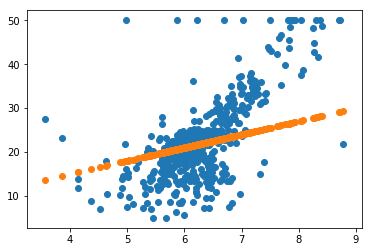

In [218]:
k = 3
b = 3
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [219]:
from functools import lru_cache  #作用为缓存，去重，将函数运行结果保存，遇到传入相同参数时，使用缓存结果即可

In [220]:
solution = dict()

In [221]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    # init
    # D(i, 0) = i
    # D(0, j) = j
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    # start
    string1_tail = string1[-1]
    string2_tail = string2[-1]
    
    candidate = [
        (edit_distance(string1[:-1], string2) + 1, "Del {}".format(string1_tail)),  # 删除
        (edit_distance(string1, string2[:-1]) + 1, "Add {}".format(string2_tail))   # 插入
    ] 
    
    if string1_tail == string2_tail:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, "No Action")  # 无动作
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, "Sub {} -> {}".format(string1_tail, string2_tail)) # 替代
    
    candidate.append(both_forward)
    
    min_distance, operation = min(candidate, key=lambda x: x[0])
    
    if operation.startswith("Del"):
        solution[(string1, string2)] = (string1[:-1], string2)
    elif operation.startswith("Add"):
        solution[(string1, string2)] = (string1, string2[:-1])
    elif operation.startswith("Sub"):
        solution[(string1, string2)] = (string1[:-1], string2[:-1])
    else:
         solution[(string1, string2)] = (string1[:-1], string2[:-1])
    
    #solution[(string1, string2)] = operation
    
    return min_distance

In [222]:
edit_distance('ABCDE', 'ABCCEF')

2

In [223]:
solution

{('A', 'A'): ('', ''),
 ('A', 'AB'): ('A', 'A'),
 ('A', 'ABC'): ('A', 'AB'),
 ('A', 'ABCC'): ('A', 'ABC'),
 ('A', 'ABCCE'): ('A', 'ABCC'),
 ('A', 'ABCCEF'): ('A', 'ABCCE'),
 ('AB', 'A'): ('A', 'A'),
 ('AB', 'AB'): ('A', 'A'),
 ('AB', 'ABC'): ('AB', 'AB'),
 ('AB', 'ABCC'): ('AB', 'ABC'),
 ('AB', 'ABCCE'): ('AB', 'ABCC'),
 ('AB', 'ABCCEF'): ('AB', 'ABCCE'),
 ('ABC', 'A'): ('AB', 'A'),
 ('ABC', 'AB'): ('AB', 'AB'),
 ('ABC', 'ABC'): ('AB', 'AB'),
 ('ABC', 'ABCC'): ('ABC', 'ABC'),
 ('ABC', 'ABCCE'): ('ABC', 'ABCC'),
 ('ABC', 'ABCCEF'): ('ABC', 'ABCCE'),
 ('ABCD', 'A'): ('ABC', 'A'),
 ('ABCD', 'AB'): ('ABC', 'AB'),
 ('ABCD', 'ABC'): ('ABC', 'ABC'),
 ('ABCD', 'ABCC'): ('ABC', 'ABC'),
 ('ABCD', 'ABCCE'): ('ABCD', 'ABCC'),
 ('ABCD', 'ABCCEF'): ('ABCD', 'ABCCE'),
 ('ABCDE', 'A'): ('ABCD', 'A'),
 ('ABCDE', 'AB'): ('ABCD', 'AB'),
 ('ABCDE', 'ABC'): ('ABCD', 'ABC'),
 ('ABCDE', 'ABCC'): ('ABCD', 'ABCC'),
 ('ABCDE', 'ABCCE'): ('ABCD', 'ABCC'),
 ('ABCDE', 'ABCCEF'): ('ABCDE', 'ABCCE')}

In [224]:
res = []
def parse_solution(string1 ,string2, solution):
    res.append((string1,string2))
    left_string1, right_string2 = solution[(string1, string2)]
    
    if not left_string1 and not right_string2: return "It's over"
    
    return parse_solution(left_string1, right_string2, solution)

In [225]:
parse_solution('ABCDE', 'ABCCEF', solution)

"It's over"

In [226]:
res

[('ABCDE', 'ABCCEF'),
 ('ABCDE', 'ABCCE'),
 ('ABCD', 'ABCC'),
 ('ABC', 'ABC'),
 ('AB', 'AB'),
 ('A', 'A')]

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

4. Using the simple words to describe: What's the machine leanring.¶

Ans:

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [227]:
import random
import matplotlib.pylab as plt
import math

In [228]:
#随机点位坐标
coordinate_x = [random.randint(-100, 100) for _ in range(20)]
coordinate_y = [random.randint(-100, 100) for _ in range(20)]

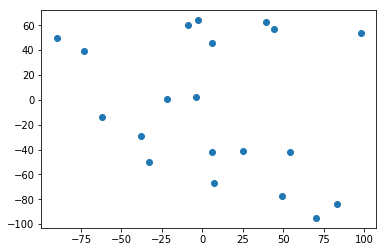

In [229]:
plt.scatter(coordinate_x, coordinate_y)

In [230]:
def get_distance(coord1, coord2):
    """计算两点的坐标"""
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

### 1. 先试试一个点出发(贪婪)

In [231]:
#先试试一个点
chosen_p = (-50, 10)
#点位坐标集合
coordinate_list = [(x, y) for x,y in zip(coordinate_x, coordinate_y)]

In [232]:
def get_shortest_path(start):
    """获得最短路径"""
    path = [start]
    for i in range(len(coordinate_list)):
        shortest_distance = float("inf")
        shortest_distance_coord = None
        for j in range(len(coordinate_list)):
            current_distance = get_distance(coordinate_list[j], start)
            if current_distance < shortest_distance:
                shortest_distance = current_distance
                shortest_distance_coord = coordinate_list[j]
        path.append(shortest_distance_coord)
        start = coordinate_list.pop(coordinate_list.index(shortest_distance_coord))
    return path

In [233]:
shortest_path = get_shortest_path(chosen_p)

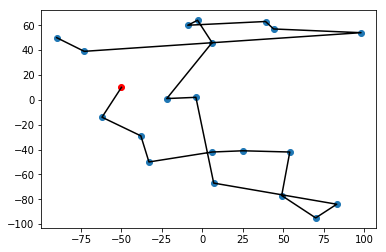

In [234]:
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
X = [x[0] for x in shortest_path]
Y = [y[1] for y in shortest_path]
plt.plot(X, Y, color="black")

In [235]:
#计算距离
distance = 0
for index, coord in enumerate(shortest_path[:-1]):
    distance += get_distance(shortest_path[index], shortest_path[index + 1])

In [236]:
distance

792.6259024601625

### 2.动态规划

In [237]:
import numpy as np

In [238]:
#随机点位坐标
coordinate_x = [random.randint(-100, 100) for _ in range(20)]
coordinate_y = [random.randint(-100, 100) for _ in range(20)]
#先试试一个点
chosen_p = (-50, 10)
coordinate_x.insert(0, chosen_p[0])
coordinate_y.insert(0, chosen_p[1])
#点位坐标集合
coordinate_list = [(x, y) for x,y in zip(coordinate_x, coordinate_y)]

In [239]:
coordinate_array = np.array(coordinate_list)

In [240]:
coordinate_array

array([[ -50,   10],
       [  43,  -10],
       [-100,  -28],
       [  93,  -44],
       [ -51,  -66],
       [  48,   13],
       [   4,   20],
       [ -36,   -4],
       [ -19,  -41],
       [  19,  -51],
       [  -7,  -91],
       [  73,    4],
       [ -42,   43],
       [  42,  -64],
       [  75,  -81],
       [  15,   -1],
       [  46,  -20],
       [  86,  -75],
       [  33,   36],
       [ -15,   55],
       [ -68,  -44]])

In [241]:
coordinate_array.shape

(21, 2)

In [242]:
#将两点之间的距离整合起来
distance_array = np.zeros((coordinate_array.shape[0], coordinate_array.shape[0]))

In [243]:
for i in range(coordinate_array.shape[0]):
    for j in range(coordinate_array.shape[0]):
               distance_array[i, j] = get_distance(coordinate_array[i], coordinate_array[j])

In [244]:
distance_array

array([[   0.        ,   95.12623192,   62.80127387,  152.85614152,
          76.00657866,   98.04590761,   54.91812087,   19.79898987,
          59.68249325,   92.09777413,  109.772492  ,  123.14625451,
          33.95585369,  118.06777715,  154.61565251,   65.9241989 ,
         100.57832769,  160.37767924,   86.97700846,   57.00877125,
          56.92099788],
       [  95.12623192,    0.        ,  144.12841496,   60.46486583,
         109.41663493,   23.53720459,   49.2036584 ,   79.22752047,
          69.3181073 ,   47.50789408,   95.18928511,   33.10589071,
         100.16985575,   54.00925847,   77.87810989,   29.41088234,
          10.44030651,   77.93587107,   47.07440918,   87.1148667 ,
         116.09048195],
       [  62.80127387,  144.12841496,    0.        ,  193.66207682,
          62.00806399,  153.57408636,  114.54256851,   68.35202996,
          82.03657721,  121.20231021,  112.32987136,  175.93464696,
          91.67878708,  146.49232062,  182.84966503,  118.12705025,


In [245]:
"""
N：坐标点总数量
coordinate_array：坐标数组
distance_array：两点距离数组
dp：动态规划的距离数组
path：每个阶段的下一步的路径
"""
N = coordinate_array.shape[0]
start = 0

In [246]:
class TSP:
    def __init__(self, distance_array, start):
        self.distance_array = distance_array
        self.start = start
        self.path = np.zeros((N, 2 ** N))
        self.dp = np.zeros((N, 2 ** N))
        
    def set_transfer(self, l):
        """将未经过的点位集合转化内数字"""
        s = 0
        for i in range(0, len(l)):
            s += 2 ** l[i]
        return s

    def tsp(self):
        """TSP接口"""
        no_passed_list = [i for i in range(1, N)]
        return self._tsp(self.start, no_passed_list)

    def _tsp(self, init, s):
        """内部实现逻辑"""
        if self.dp[init][self.set_transfer(s)] != 0:
            return self.dp[init][self.set_transfer(s)]
        if len(s) == 0:
            return self.distance_array[init][self.start]

        min_distance = float("inf")

        for i in range(len(s)):
            no_passed_list_copy = s.copy()
            no_passed_list_copy.pop(i)
            distance = self.distance_array[init][s[i]] + self._tsp(s[i], no_passed_list_copy)
            if distance < min_distance:
                min_distance = distance
                next_init = s[i]

        no_passed_transfer_num = self.set_transfer(s)

        self.path[init][no_passed_transfer_num] = next_init
        self.dp[init][no_passed_transfer_num] = min_distance

        return min_distance
        

In [247]:
# 老电脑性能不行。。。
T = TSP(distance_array, 0)
T.tsp()

MemoryError: 

In [ ]:
T.path

In [ ]:
num_list = [i for i in range(T.distance_array)]
start = 0
while len(num_list) > 0:
    num_list.pop(num_list.index(start))
    m = T.set_transfer(num_list)
    next = T.path[start][m]
    print(start, '->', next)
    start = next

In [ ]:
tsp

### 三个起始点

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [313]:
#随机点位坐标
coordinate_x = [random.randint(-100, 100) for _ in range(20)]
coordinate_y = [random.randint(-100, 100) for _ in range(20)]

In [314]:
chosen_p1 = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

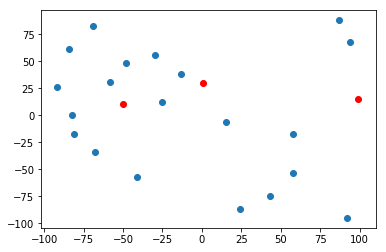

In [315]:
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p1[0]], [chosen_p1[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

#### 思路： 以三个点来划分三个区域，取两个点中心线平行y轴

In [316]:
chosen_sort = sorted([chosen_p1, chosen_p2, chosen_p3], key = lambda x:x[0])

In [323]:
# 三个点两条分割线
mid_line12 = (chosen_sort[1][0] + chosen_sort[0][0]) // 2
mid_line23 = (chosen_sort[2][0] + chosen_sort[1][0]) // 2
# 点位坐标集合
coordinate_list = [(x, y) for x, y in zip(coordinate_x, coordinate_y)]

In [324]:
#将点位根据分割线分为三部分
coordinate_list_1 = []
coordinate_list_2 = []
coordinate_list_3 = []
for coord in coordinate_list:
    if coord[0] <= mid_line12:
        coordinate_list_1.append(coord)
    elif mid_line12 < coord[0] <= mid_line23:
        coordinate_list_2.append(coord)
    else:
        coordinate_list_3.append(coord)
coordinate_list_2

[(-13, 38), (15, -6), (43, -75), (24, -87)]

In [325]:
def get_shortest_path(start,coordinate_list):
    """获得最短路径"""
    path = [start]
    for i in range(len(coordinate_list)):
        shortest_distance = float("inf")
        shortest_distance_coord = None
        for j in range(len(coordinate_list)):
            current_distance = get_distance(coordinate_list[j], start)
            if current_distance < shortest_distance:
                shortest_distance = current_distance
                shortest_distance_coord = coordinate_list[j]
        path.append(shortest_distance_coord)
        start = coordinate_list.pop(coordinate_list.index(shortest_distance_coord))
    return path

In [326]:
# 获取最短路径
shortest_path_1 = get_shortest_path(chosen_p1, coordinate_list_1)
shortest_path_2 = get_shortest_path(chosen_p2, coordinate_list_2)
shortest_path_3 = get_shortest_path(chosen_p3, coordinate_list_3)

In [329]:
# 计算路径
distance = 0
for path in [shortest_path_1,shortest_path_2,shortest_path_3]:
    for index, coord in enumerate(path[:-1]):
        distance += get_distance(path[index], path[index + 1])

In [330]:
distance

889.7342194274264

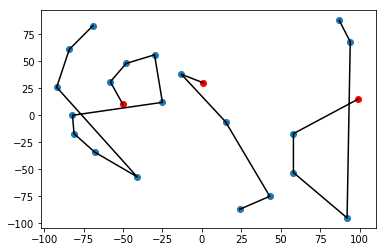

In [327]:
# 画图
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p1[0]], [chosen_p1[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')
X1 = [x[0] for x in shortest_path_1]
Y1 = [y[1] for y in shortest_path_1]
X2 = [x[0] for x in shortest_path_2]
Y2 = [y[1] for y in shortest_path_2]
X3 = [x[0] for x in shortest_path_3]
Y3 = [y[1] for y in shortest_path_3]
plt.plot(X1, Y1, color="black")
plt.plot(X2, Y2, color="black")
plt.plot(X3, Y3, color="black")

shuro